# 1 Checking the data and null values

In [9]:
import pandas as pd

# Load dataset
df = pd.read_csv("students.csv")

# Display first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Check column data types
print(df.info())


   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course    

# 2 making new column pass

In [16]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
categorical_columns = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
encoder = LabelEncoder()

for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

# Define target variable (Pass/Fail based on math score)
df['pass'] = df['math score'].apply(lambda x: 1 if x >= 50 else 0)  # 1 = Pass, 0 = Fail

# Drop original math score column
df = df.drop(columns=['math score'])

print(df.head())


   gender  race/ethnicity  parental level of education  lunch  \
0       0               1                            1      1   
1       0               2                            4      1   
2       0               1                            3      1   
3       1               0                            0      0   
4       1               2                            4      1   

   test preparation course  reading score  writing score  pass  
0                        1             72             74     1  
1                        0             90             88     1  
2                        1             95             93     1  
3                        1             57             44     0  
4                        1             78             75     1  


# 3 splitting data

In [22]:
# Check column names
print(df.columns)

# Define X and y
X = df.drop(columns=['pass'])  # Features
y = df['pass']  # Target variable

# Split into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data: {X_train.shape}, Testing data: {X_test.shape}")

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'reading score', 'writing score', 'pass'],
      dtype='object')
Training data: (800, 7), Testing data: (200, 7)


# 4 evaluate and training

In [36]:
from sklearn.linear_model import LogisticRegression

# Create and train the Logistic Regression model with increased iterations
logistic_model = LogisticRegression(max_iter=500)  # Increased max_iter from default 100 to 500
logistic_model.fit(X_train, y_train)

# Predict on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report

# Print Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print Classification Report
print('Classification Report:\n', classification_report(y_test, y_pred))


Accuracy: 0.89
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.62      0.66        34
           1       0.92      0.95      0.93       166

    accuracy                           0.89       200
   macro avg       0.81      0.78      0.80       200
weighted avg       0.89      0.89      0.89       200



In [48]:
from sklearn.linear_model import LogisticRegression

# Train model with class balancing
logistic_model_balanced = LogisticRegression(max_iter=500, class_weight='balanced')
logistic_model_balanced.fit(X_train, y_train)

# Predict again
y_pred_balanced = logistic_model_balanced.predict(X_test)

# Recalculate accuracy & metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred_balanced)
precision = precision_score(y_test, y_pred_balanced)
recall = recall_score(y_test, y_pred_balanced)
f1 = f1_score(y_test, y_pred_balanced)

print(f'Balanced Accuracy: {accuracy:.2f}')
print(f'Balanced Precision: {precision:.2f}')
print(f'Balanced Recall: {recall:.2f}')
print(f'Balanced F1 Score: {f1:.2f}')


Balanced Accuracy: 0.90
Balanced Precision: 0.97
Balanced Recall: 0.90
Balanced F1 Score: 0.93


In [106]:
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder

# Load your training data
df = pd.read_csv("students.csv")  # Replace with actual file

# Define categorical columns
categorical_columns = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

# Create label encoders and fit them
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Apply transformation to training data
    label_encoders[col] = le  # Store the fitted encoder

# Save the label encoders for future use
joblib.dump(label_encoders, "label_encoders.pkl")
print("✅ Label encoders saved successfully!")


✅ Label encoders saved successfully!


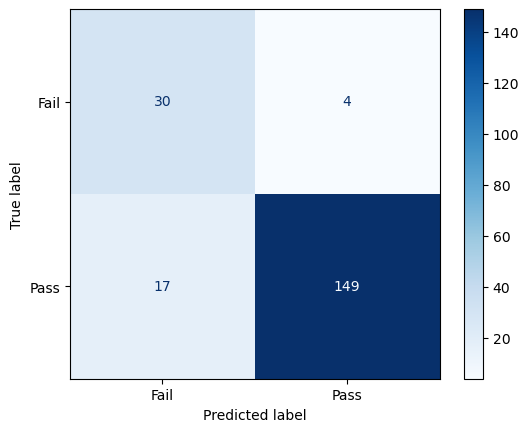

In [60]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict using the balanced model
y_pred_balanced = logistic_model_balanced.predict(X_test)

# Generate confusion matrix
cm_balanced = confusion_matrix(y_test, y_pred_balanced)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_balanced, display_labels=["Fail", "Pass"])
disp.plot(cmap='Blues')

# Show the plot
plt.show()


In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs', 'newton-cg'],  # Optimization algorithms
    'max_iter': [100, 200, 500]  # Iterations for convergence
}

# Initialize model
logistic = LogisticRegression(class_weight='balanced')

# Grid Search with Cross Validation
grid_search = GridSearchCV(logistic, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best Parameters
print("Best Parameters:", grid_search.best_params_)

# Train best model
best_model = grid_search.best_estimator_

# Evaluate on test data
y_pred_best = best_model.predict(X_test)


Best Parameters: {'C': 10, 'max_iter': 100, 'solver': 'newton-cg'}


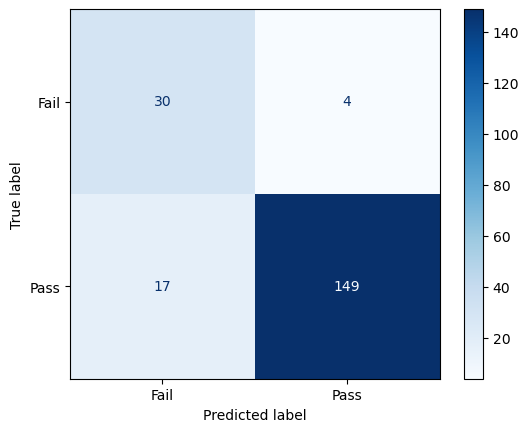

In [68]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# New confusion matrix
cm_best = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_best, display_labels=["Fail", "Pass"])
disp.plot(cmap='Blues')
plt.show()


In [110]:
print("Features used in training:", df.columns.tolist())  # Check training feature names


Features used in training: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']


In [114]:
# Create new test student data with only 7 features (remove one)
new_students = pd.DataFrame([
    ['male', 'group B', "bachelor's degree", 'standard', 'completed', 80, 85]
], columns=['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 
            'math score', 'reading score'])  # Removed 'writing score'


In [116]:
import pandas as pd
import joblib

# Load trained model
model = joblib.load("student_performance_model.pkl")

# Load correctly saved label encoders
label_encoders = joblib.load("label_encoders.pkl")

# Ensure categorical columns are encoded
for col in label_encoders.keys():
    new_students[col] = label_encoders[col].transform(new_students[col])

# Convert DataFrame to numpy array
new_students_encoded = new_students.values

# Make prediction
predicted_result = model.predict(new_students_encoded)
print("Predicted Pass/Fail:", "Pass" if predicted_result[0] == 1 else "Fail")


Predicted Pass/Fail: Pass


C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [130]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("students.csv")

# Keep only the required columns
df = df[['test preparation course', 'math score', 'reading score', 'writing score']]

# Encode categorical variable
label_encoder = LabelEncoder()
df['test preparation course'] = label_encoder.fit_transform(df['test preparation course'])

# Save encoder for future use
joblib.dump(label_encoder, "test_prep_encoder.pkl")

# Define target variable (Pass/Fail based on math score)
df['pass'] = df['math score'].apply(lambda x: 1 if x >= 50 else 0)  # 1 = Pass, 0 = Fail

# Define X and y
X = df[['test preparation course', 'math score', 'reading score', 'writing score']]  # Only these features
y = df['pass']

# Split into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression Model
model = LogisticRegression(max_iter=500, class_weight="balanced")
model.fit(X_train, y_train)

# Save model
joblib.dump(model, "student_performance_model.pkl")

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_report(y_test, y_pred))


Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00       166

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [132]:
# Load trained model and encoder
model = joblib.load("student_performance_model.pkl")
label_encoder = joblib.load("test_prep_encoder.pkl")

# Sample student data (modify as needed)
new_students = pd.DataFrame([
    ['completed', 80, 85, 90]
], columns=['test preparation course', 'math score', 'reading score', 'writing score'])

# Encode 'test preparation course'
new_students['test preparation course'] = label_encoder.transform(new_students['test preparation course'])

# Make prediction
predicted_result = model.predict(new_students)
print("Predicted Pass/Fail:", "Pass" if predicted_result[0] == 1 else "Fail")


Predicted Pass/Fail: Pass


In [138]:
# Load trained model and encoder
model = joblib.load("student_performance_model.pkl")
label_encoder = joblib.load("test_prep_encoder.pkl")

# Sample student data (modify as needed)
new_students = pd.DataFrame([
    ['none', 60, 0, 0]
], columns=['test preparation course', 'math score', 'reading score', 'writing score'])

# Encode 'test preparation course'
new_students['test preparation course'] = label_encoder.transform(new_students['test preparation course'])

# Make prediction
predicted_result = model.predict(new_students)
print("Predicted Pass/Fail:", "Pass" if predicted_result[0] == 1 else "Fail")


Predicted Pass/Fail: Pass


In [140]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import joblib

# Load dataset
df = pd.read_csv("students.csv")  # Adjust the path if needed

# Keep only required columns
selected_columns = ['test preparation course', 'math score', 'reading score', 'writing score']
df = df[selected_columns]

# Encode categorical column
le = LabelEncoder()
df['test preparation course'] = le.fit_transform(df['test preparation course'])

# Define Pass/Fail (based on the average of three scores)
df['pass'] = df[['math score', 'reading score', 'writing score']].mean(axis=1).apply(lambda x: 1 if x >= 50 else 0)

# Define Features & Target
X = df.drop(columns=['pass'])  # Features
y = df['pass']  # Target variable

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression(max_iter=500, class_weight='balanced')
model.fit(X_train, y_train)

# Save the model
joblib.dump(model, "student_performance_model.pkl")
joblib.dump(le, "test_prep_encoder.pkl")

print("✅ Model retrained and saved successfully!")


✅ Model retrained and saved successfully!


In [161]:
import pandas as pd
import joblib

# Load trained model
model = joblib.load("student_performance_model.pkl")
test_prep_encoder = joblib.load("test_prep_encoder.pkl")

# Create new student data
new_students = pd.DataFrame([
    ['none', 50, 50, 50]  # Example test case
], columns=['test preparation course', 'math score', 'reading score', 'writing score'])

# Encode 'test preparation course'
new_students['test preparation course'] = test_prep_encoder.transform(new_students['test preparation course'])

# Convert DataFrame to numpy array
new_students_encoded = new_students.values

# Make prediction
predicted_result = model.predict(new_students_encoded)
print("Predicted Pass/Fail:", "Pass" if predicted_result[0] == 1 else "Fail")


Predicted Pass/Fail: Fail


C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
